# MLT

The main concepts to implement from scratch:
- Linear regression (One Variable + Multiple Variable + Polynomial)
- K Nearest Neighbors (KNN)
- Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


# Load the data
data = load_iris()
df = pd.DataFrame(data=data['data'],columns=data.feature_names)
df['Target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

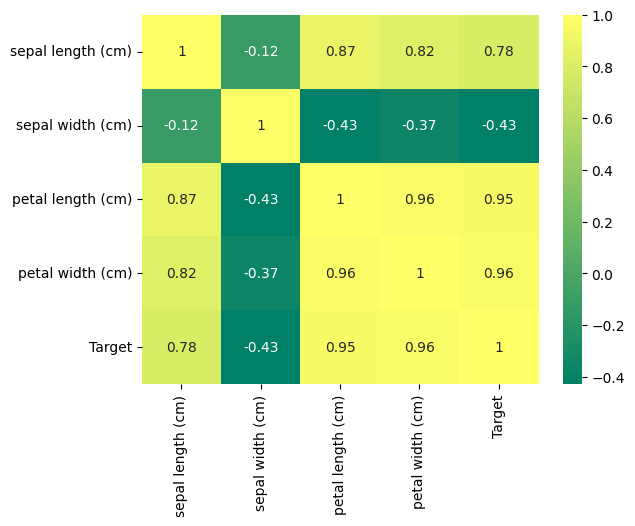

In [2]:
sns.heatmap(df.corr(),annot=True,cmap='summer')

## 1. Linear Regression

### 1.1 One Variable

Here Petal lenght (Feature) and Petal width (Target) is selected, as they have a high correlation (0.96). Only 2 features are  present for this Linear Regression

In [3]:
df1 = df[['petal length (cm)','petal width (cm)']]
df1.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [4]:
# Mannual implementaion of One Varaiable Linear Regression using Gradient Descent

def one_variable_linear_regression(X,Y):
    # Initialze Varaibles
    m = 0 #Slope
    c = 0 #Intercept
    L = 0.0001 #Learning Rate
    Th = 0.000001 #Threshold

    n = float(len(X)) #Number of elements in X

    # Gradient Descent
    while True:
        Y_pred = m*X + c # Current Prediction of X
        e = Y - Y_pred #error
        D_m = (-2/n) * sum(X * e) # Derivative of m 
        D_c = (-2/n) * sum(e) # Derivative of c
        m_new  = m - L * D_m # Update m
        c_new = c - L * D_c #Update c

        if abs(m_new-m) < Th and abs(c_new-c) < Th:
            print(f' m value : {m_new} and c value : {c_new}')
            return m_new, c_new
            

        m = m_new
        c = c_new

# Slit dataframe into X and Y
X = df['petal length (cm)']
y = df['petal width (cm)']
m, c = one_variable_linear_regression(X,y)


 m value : 0.40932945083592376 and c value : -0.33392691463942537


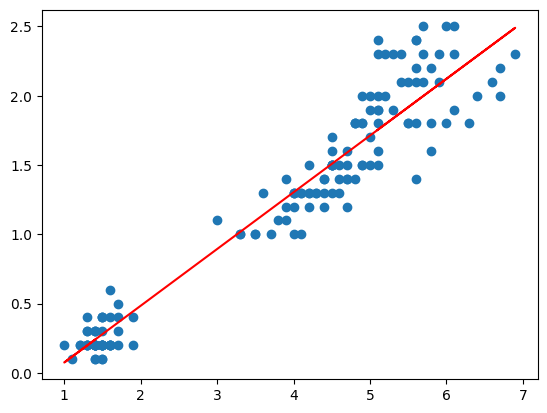

In [5]:
Y_pred = m * X + c

plt.scatter(X, y)
plt.plot(X, Y_pred, 'r', label='Fitted line')
plt.show()


In [6]:
# Evaluate the model

def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

def rmse(Y, Y_):
  return np.sqrt(np.mean((Y - Y_) ** 2))

print(f"The R^2 score : {r2_score(y,Y_pred)}")
print(f"The RMSE score : {rmse(y,Y_pred)}")

The R^2 score : 92.68450455973863
The RMSE score : 0.2054753760695314


### 1.2 Multi-Variable (2 Variable)


Here we take Petal length and Petal width as features variables and Sepal length, as they have a high correlation of (0.87 & 0.82) respectively. 

In [7]:
df2 = df[['petal length (cm)','petal width (cm)','sepal length (cm)']]
df2.describe()

,petal length (cm),petal width (cm),sepal length (cm)
count,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333
std,1.765298,0.762238,0.828066
min,1.000000,0.100000,4.300000
25%,1.600000,0.300000,5.100000
50%,4.350000,1.300000,5.800000
75%,5.100000,1.800000,6.400000
max,6.900000,2.500000,7.900000


In [8]:
# Manual Implementation of Multi Variable Linear Regression using Gradient Descent

def two_variable_linear_regression(x,y):
    m = np.zeros(x.shape[1]) #Slope  -> Vector array - same size as number of features
    c = 0 #Intercept
    L = 0.0001 #Learning rate
    Th = 0.000001 #Threshold

    n = float(len(x)) # Number of elements in x

    # Gradient Descent
    while True:
        y_pred = np.dot(x,m) + c # Current prediction 
        e = y - y_pred # Error
        D_m = (-2/n) * np.dot(x.T,e) # Derivative of m
        D_c = (-2/n) * np.sum(e) # Derivative of c
        m_new = m - L * D_m
        c_new = c - L * D_c
        
        if np.all(np.abs(m_new - m) < Th) and np.abs(c_new - c) < Th:
            print(f' m value : {m_new} and c value : {c_new}')
            return m_new, c_new
        
        m = m_new
        c = c_new
    
# Slit dataframe into X and Y
X = df2[['petal length (cm)','petal width (cm)']]
y = df2['sepal length (cm)']
m, c = two_variable_linear_regression(X,y)


 m value : [ 0.61194665 -0.47990473] and c value : 4.116901882120549


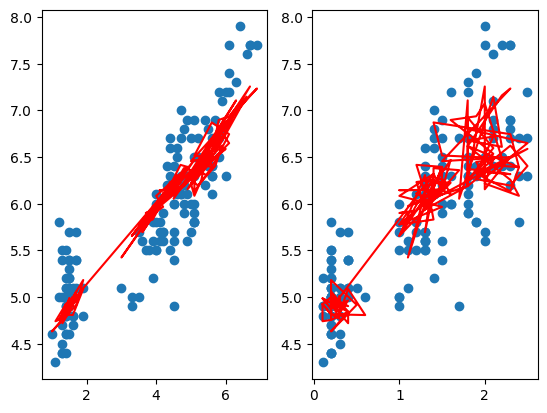

In [9]:
Y_pred = np.dot(m,X.T) + c


plt.subplot(1, 2, 1)
plt.scatter(X['petal length (cm)'], y)
plt.plot(X['petal length (cm)'], Y_pred, 'r', label='Fitted line')


plt.subplot(1, 2, 2)
plt.scatter(X['petal width (cm)'], y)
plt.plot(X['petal width (cm)'], Y_pred, 'r', label='Fitted line')
plt.show()


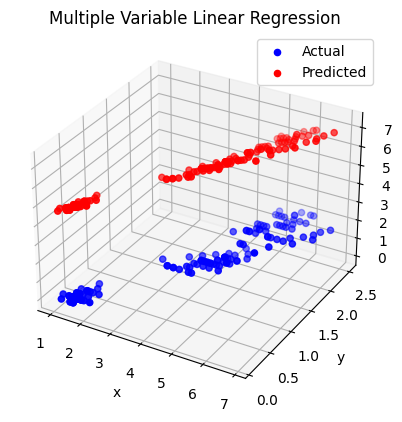

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], y, color='blue', label='Actual')

# Plot the predicted data points
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], Y_pred, color='red', label='Predicted')

# Set the labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Multiple Variable Linear Regression')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [10]:
# Evaluate the model

def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

def rmse(Y, Y_):
  return np.sqrt(np.mean((Y - Y_) ** 2))

print(f"The R^2 score : {r2_score(y,Y_pred)}")
print(f"The RMSE score : {rmse(y,Y_pred)}")

The R^2 score : 76.46096942729339
The RMSE score : 0.40041174823722087


## 2. K Nearest Neighbors

In [11]:
# Import additional Dependencies for K nearest neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Accuracy Score : 1.0


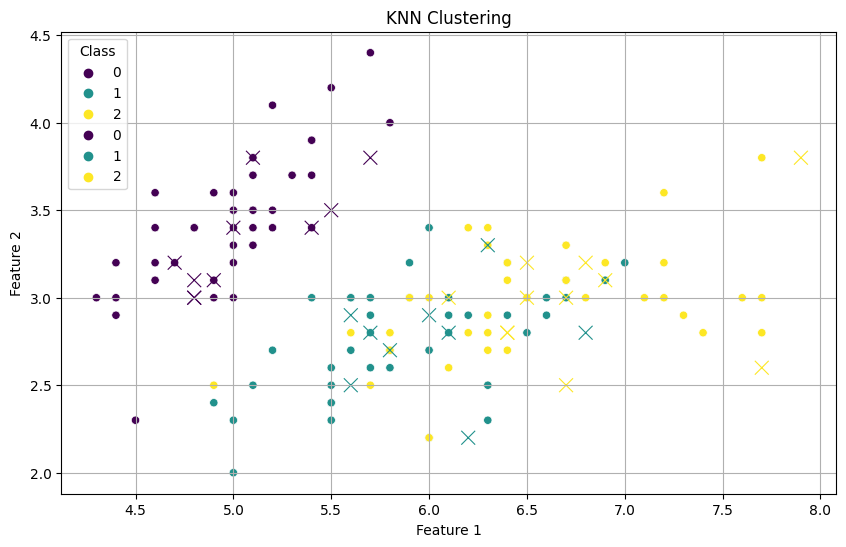

In [15]:
# Euclidean distance between any 2 points
def euclidean_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

# KNN Algorithm
def knn(x,y,k):
    y_pred = [] # To store prediction values

    # split the data into training and testing
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # Training
    ## Compute euclidean distance between all points of train and test
    for test_point in x_test:
        ## Get the distance between test point and all other points
        distances = [euclidean_distance(test_point,train_point) for train_point in x_train]
        ## Sort the distances and get the indices of the first k neighbors
        k_indices = np.argsort(distances)[:k]
        ## Get the labels of the k nearest neighbor
        k_nearest_labels = [y_train[i] for i in k_indices]
        ## Predict the label of the test point
        most_common = max(k_nearest_labels, key=k_nearest_labels.count)
        y_pred.append(most_common)
    
    print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')

    # Plot the results
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train,palette='viridis')
    sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_pred,palette='viridis',marker='x',s=100)
        
    plt.title('KNN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# Let's fix a value for k
k = 3

# X,Y
x = df.drop('Target',axis=1).values
y = df['Target'].values

# # Call the KNN function
knn(x,y,k)



## 3. PCA

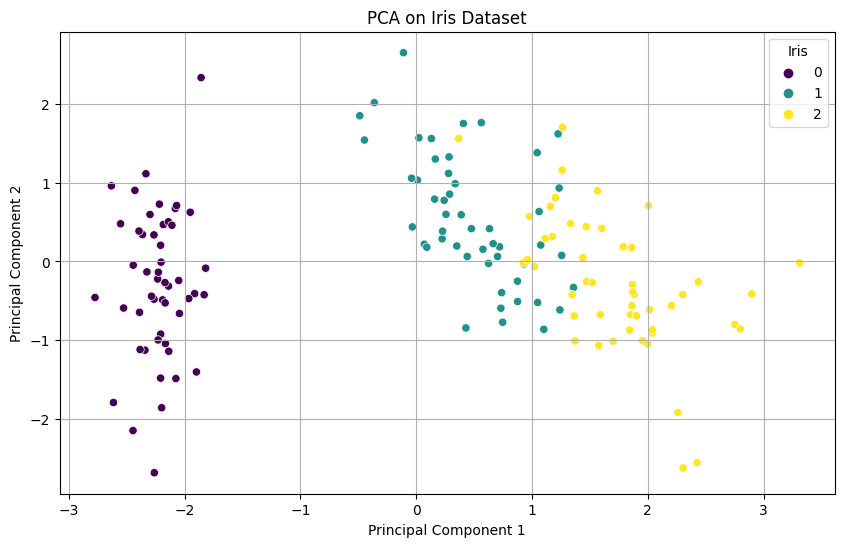

   Principal Component 1  Principal Component 2
0              -2.264703              -0.480027
1              -2.080961               0.674134
2              -2.364229               0.341908
3              -2.299384               0.597395
4              -2.389842              -0.646835


In [23]:
# Split X and Y
x = df.drop('Target',axis=1).values
y = df['Target'].values

def PCA(x,y):
    # Standardize the data
    x_std = (x - x.mean(axis=0)) / x.std(axis=0)

    #Covariance Matrix
    cov_matrix = np.cov(x_std.T)

    # Eigen Values and Eigen Vectors
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

    # sort eigen values and its corresponding eigen vectors in Descending order
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]

    # State number of components
    components = 2

    # Top Eigen Vectors based on components
    top_eigen_vectors = eigen_vectors[:,:components]

    # Project the data into the selected eigen vectors
    projected_data = np.dot(x_std,top_eigen_vectors)

    # PLot the projected data
    plt.figure(figsize=(10,6))
    sns.scatterplot(x = projected_data[:,0],y = projected_data[:,1],hue=y,palette='viridis')
    plt.title('PCA on Iris Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Iris')
    plt.grid(True)
    plt.show()

    # Display the Projected data
    PCA_df = pd.DataFrame(data=projected_data,columns=['Principal Component 1','Principal Component 2'])
    print(PCA_df.head())


PCA(x,y)